# Gaussain Mixture Model( MAP Classification Rule)

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
from scipy.stats import multivariate_normal
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = [9,9]

np.random.seed(78)
features = 3
samples = 10000 
C = 4

# Mean matrix for different distributions
mean = np.zeros((1,3,4))
mean[:,:,0] = [-1,-1,0]
mean[:,:,1] = [-1,1,0]
mean[:,:,2] = [1,-1,0]
mean[:,:,3] = [1,1,0]

# Covariance matrix for the different distributions
cov = np.zeros((3,3,4))
cov[:,:,0] = 0.2*np.eye(3)
cov[:,:,1] = 0.3*np.eye(3)
cov[:,:,2] = 0.15*np.eye(3)
cov[:,:,3] = 0.4*np.eye(3)

# priors for four classes
prior = [0.2,0.25,0.25,0.3]

class_labels = {
    1: {'mean': np.array([-1,-1,0]), 'cov': cov[:,:,0], 'prior': prior[0]},
    2: {'mean': np.array([-1,1,0]), 'cov': cov[:,:,1], 'prior': prior[1]},
    3: {'mean': np.array([1,-1,0]), 'cov': cov[:,:,2], 'prior': prior[2]},
    4: {'mean': np.array([1,1,0]), 'cov': cov[:,:,3], 'prior': prior[3]}
}

label = np.zeros((2,samples))
label[0, :] = (np.random.randint(1, 5,samples))
X = np.zeros((features,samples))



In [3]:
cov[:,:,3]

array([[0.4, 0. , 0. ],
       [0. , 0.4, 0. ],
       [0. , 0. , 0.4]])

In [4]:
for i, lbl in enumerate(label[0, :]):
  X[:, i] = np.random.multivariate_normal(class_labels[lbl]['mean'], class_labels[lbl]['cov'])

In [5]:
from scipy.stats import multivariate_normal
num_classes = 4
P_X_L = np.zeros((num_classes, samples))

for cl in range(num_classes):
  P_X_L[cl, :] = multivariate_normal.pdf(X.T, mean=class_labels[cl+1]['mean'],cov=class_labels[cl+1]['cov'])
print(P_X_L.shape)

(4, 10000)


In [16]:
priors = np.array(prior).reshape(1, 4)
P_X = np.dot(priors, P_X_L)
print(P_X.shape)

P_L_X = np.zeros((num_classes, samples))
for cl in range(num_classes):
  P_L_X[cl, :] = P_X_L[cl, :] * class_labels[cl+1]['prior'] / P_X
print(P_L_X.shape)

## Cost/loss matrix
loss = np.ones([4,4]) - np.eye(4) 
R_L_X = np.dot(loss, P_L_X)
print(R_L_X.shape)
# Min risk labels
curr_preds = np.argmin(R_L_X, axis = 0) + 1
label[1, :] = curr_preds
print(np.unique(label[1, :]))
print(np.sum(label[1, :] == label[0, :])/samples)

(1, 10000)
(4, 10000)
(4, 10000)
[1. 2. 3. 4.]
0.9537


In [7]:
x = np.array([0, 1, 2, 3, 2, 2])
print(x + 1)

[1 2 3 4 3 3]


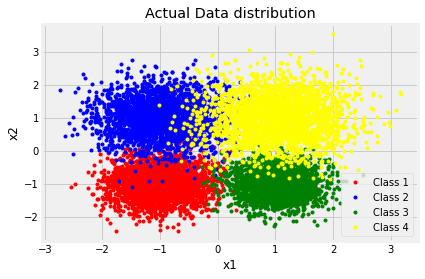

In [8]:
x0 = [i for i in range(label.shape[1]) if (label[0,i] == 1)]
x1 = [i for i in range(label.shape[1]) if (label[0,i] == 2 )]
x2 = [i for i in range(label.shape[1]) if (label[0,i] == 3 )]
x3 = [i for i in range(label.shape[1]) if (label[0,i] == 4 )]
plt.plot(X[0,x0],X[1,x0],'.',color ='red')
plt.plot(X[0,x1],X[1,x1],'.',color = 'blue')
plt.plot(X[0,x2],X[1,x2],'.',color = 'green')
plt.plot(X[0,x3],X[1,x3],'.',color = 'yellow')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Actual Data distribution")
plt.legend(['Class 1','Class 2','Class 3','Class 4'])
plt.show()

NameError: ignored

x11 2538
x12 55
x13 20
x14 5
x21 50
x22 2268
x23 0
x24 117
x31 22
x32 0
x33 2402
x34 37
x41 7
x42 93
x43 57
x44 2329


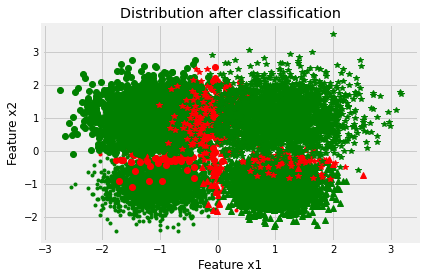

In [17]:

x11 = [i for i in range(label.shape[1]) if (label[0,i] == 1 and label[1,i] == 1)]
x12 = [i for i in range(label.shape[1]) if (label[0,i] == 1 and label[1,i] == 2)]
x13 = [i for i in range(label.shape[1]) if (label[0,i] == 1 and label[1,i] == 3)]
x14 = [i for i in range(label.shape[1]) if (label[0,i] == 1 and label[1,i] == 4)]
x21 = [i for i in range(label.shape[1]) if (label[0,i] == 2 and label[1,i] == 1)]
x22 = [i for i in range(label.shape[1]) if (label[0,i] == 2 and label[1,i] == 2)]
x23 = [i for i in range(label.shape[1]) if (label[0,i] == 2 and label[1,i] == 3)]
x24 = [i for i in range(label.shape[1]) if (label[0,i] == 2 and label[1,i] == 4)]
x31 = [i for i in range(label.shape[1]) if (label[0,i] == 3 and label[1,i] == 1)]
x32 = [i for i in range(label.shape[1]) if (label[0,i] == 3 and label[1,i] == 2)]
x33 = [i for i in range(label.shape[1]) if (label[0,i] == 3 and label[1,i] == 3)]
x34 = [i for i in range(label.shape[1]) if (label[0,i] == 3 and label[1,i] == 4)]
x41 = [i for i in range(label.shape[1]) if (label[0,i] == 4 and label[1,i] == 1)]
x42 = [i for i in range(label.shape[1]) if (label[0,i] == 4 and label[1,i] == 2)]
x43 = [i for i in range(label.shape[1]) if (label[0,i] == 4 and label[1,i] == 3)]
x44 = [i for i in range(label.shape[1]) if (label[0,i] == 4 and label[1,i] == 4)]

print('x11',len(x11))
print('x12',len(x12))
print('x13',len(x13))
print('x14',len(x14))
print('x21',len(x21))
print('x22',len(x22))
print('x23',len(x23))
print('x24',len(x24))
print('x31',len(x31))
print('x32',len(x32))
print('x33',len(x33))
print('x34',len(x34))
print('x41',len(x41))
print('x42',len(x42))
print('x43',len(x43))
print('x44',len(x44))

plt.plot(X[0,x11],X[1,x11],'.',color ='g')
plt.plot(X[0,x12],X[1,x12],'.',color = 'r')
plt.plot(X[0,x13],X[1,x13],'.',color = 'r')
plt.plot(X[0,x14],X[1,x14],'.',color = 'r')
plt.plot(X[0,x21],X[1,x21],'o',color = 'r')
plt.plot(X[0,x22],X[1,x22],'o',color = 'g')
plt.plot(X[0,x23],X[1,x23],'o',color = 'r')
plt.plot(X[0,x24],X[1,x24],'o',color = 'r')
plt.plot(X[0,x31],X[1,x31],'^',color ='r')
plt.plot(X[0,x32],X[1,x32],'^',color ='r')
plt.plot(X[0,x33],X[1,x33],'^',color ='g')
plt.plot(X[0,x34],X[1,x34],'^',color ='r')
plt.plot(X[0,x41],X[1,x41],'*',color = 'r')
plt.plot(X[0,x42],X[1,x42],'*',color = 'r')
plt.plot(X[0,x43],X[1,x43],'*',color = 'r')
plt.plot(X[0,x44],X[1,x44],'*',color = 'g')
#plt.legend(["class 1 correctly classified",'class 1 wrongly classified','class 2 correctly classified','class 2 wrongly classified'])

plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.title('Distribution after classification')
horizontalGrid = np.linspace(np.floor(min(X[0,:])),np.ceil(max(X[0,:])),101);
verticalGrid = np.linspace(np.floor(min(X[1,:])),np.ceil(max(X[1,:])),91);
dsg = np.zeros((91,101))
a = np.array(np.meshgrid(horizontalGrid,verticalGrid))
#for i in range(91):
#  for j in range(101):
#    p = 0.5 *multivariate_normal.pdf(np.array([a[0][i][j], a[1][i][j]]),mean=mean[:,2], cov =
#cov[:,:,2]) + 0.5*multivariate_normal.pdf(np.array([a[0][i][j], a[1][i][j]]),mean=mean[:,3], cov =
#cov[:,:,3])
#    q = 0.5 *multivariate_normal.pdf(np.array([a[0][i][j], a[1][i][j]]),mean=mean[:,0], cov =
#cov[:,:,0]) + 0.5*multivariate_normal.pdf(np.array([a[0][i][j], a[1][i][j]]),mean=mean[:,1], cov =
#cov[:,:,1])
#    dsg[i][j] = np.log(p) - np.log(q) - np.log(gamma)
#plt.contour(a[0],a[1],dsg)
plt.show()